### **Task 2: For the given adult.csv dataset, perform below operations.**

### **Imports**

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc, roc_auc_score

### **1.	Upload data set into the dataframe**

In [175]:
df = pd.read_csv("adultPrac7.csv")

In [176]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [177]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [178]:
print(df.isnull().sum())
print(f'\ntotal no. of null values = {df.isnull().sum().sum()}')

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

total no. of null values = 0


### **2.	Check the shape of the data set.**

In [179]:
df.shape

(32561, 15)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### **3. Find out all the categorical columns from the data set**

In [181]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


### **4. Check if null values exist in all the categorical columns**

In [182]:
for col in cat_cols:
  print(f'{col} has null values => {df[col].isnull().values.any()}')

workclass has null values => False
education has null values => False
marital_status has null values => False
occupation has null values => False
relationship has null values => False
race has null values => False
sex has null values => False
native_country has null values => False
income has null values => False


### **5. Identify the problems with “workclass”, “Occupation”,”native_country” columns and rectify it.**

In [183]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [184]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [185]:
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [186]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [187]:
# to replace ? with np.nan
df.replace(' ?', np.nan, inplace=True)

In [188]:
# to fill null with most freq values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

### **6. Explore numeric columns and check any null values exist for the numeric columns.**

In [189]:
num_cols = df._get_numeric_data().columns
print(num_cols)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [190]:
# to check for nulls
print(df[num_cols].isna().sum())

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64


In [191]:
for col in df.columns:
  print(f"unique values for {col} => {df[col].unique()}")

unique values for age => [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
unique values for workclass => [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
unique values for fnlwgt => [ 77516  83311 215646 ...  34066  84661 257302]
unique values for education => [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
unique values for education_num => [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
unique values for marital_status => [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
unique values for occupation => [' Adm-clerical' ' Exec-man

### **7. Create a feature vector with x= all the columns except income and y=income**

In [192]:
x = df.loc[:, df.columns!="income"]
y = df["income"]

### **8. Implement feature engineering for the train, test split data set:**
- Check the data types of columns of the input features of training data set
- Identify categorical columns that has null values and fill them with most probable value in the data set
- Repeat above step for the input features of test data set
- Apply one hot encoding on all the categorical columns
- Apply feature scaling using robust scaler

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

- Check the data types of columns of the input features of training data set

In [194]:
x_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

-	Identify categorical columns that has null values and fill them with most probable value in the data set

In [195]:
cat_cols = x_train.select_dtypes(include='object').columns
print(f"categorical columns => {cat_cols}")
print(df[cat_cols].isnull().sum())
print(f"\ntotal null values => {df[cat_cols].isnull().sum().sum()}")

categorical columns => Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

total null values => 0


- Repeat above step for the input features of test data set

In [196]:
x_test.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [197]:
cat_cols = x_test.select_dtypes(include='object').columns
print(f"categorical columns => {cat_cols}")
print(df[cat_cols].isnull().sum())
print(f"\ntotal null values => {df[cat_cols].isnull().sum().sum()}")

categorical columns => Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

total null values => 0


In [198]:
y.replace(' <=50K',0, inplace=True)
y.replace(' >50K',1, inplace=True)

-	Apply one hot encoding on all the categorical columns

In [199]:
cat_cols = x.select_dtypes(include='object').columns

x = pd.get_dummies(x, columns=cat_cols)

-	Apply feature scaling using robust scaler

In [200]:
scaler = RobustScaler()
x = scaler.fit_transform(x)

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### **Task 4: Implement Naïve Bayes on the given data set.**

In [202]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)
print(y_pred)

[0 1 1 ... 0 0 0]


### **Task 5: Print confusion matrix.**

In [203]:
print(confusion_matrix(y_test, y_pred))

[[3964 1005]
 [ 279 1265]]


### **Task 6: Check accuracy score of the classifier.**

In [207]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy =>", accuracy)

accuracy => 0.8028558268079227


### **Task 7: Print classification report using sklearn.metrics**

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4969
           1       0.56      0.82      0.66      1544

    accuracy                           0.80      6513
   macro avg       0.75      0.81      0.76      6513
weighted avg       0.84      0.80      0.81      6513



### **Task 8: Draw ROC curve for the model.**

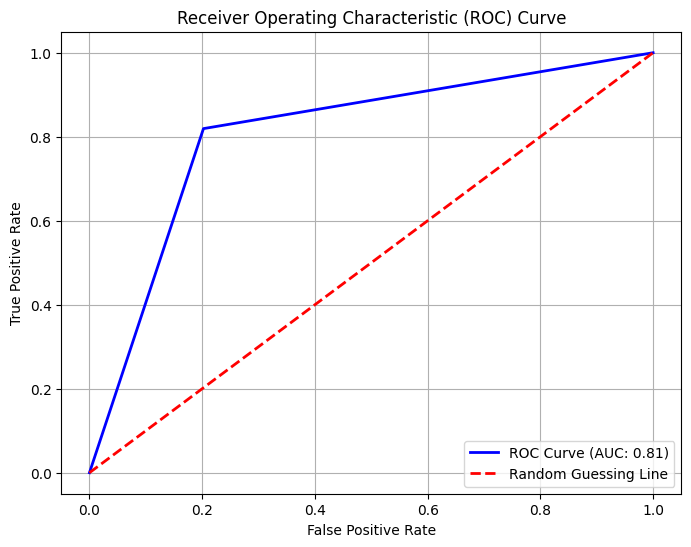

In [209]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC: {auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--", label="Random Guessing Line")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()